In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv(r"D:/Downloads/heart_disease_dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [19]:
from sklearn.preprocessing import StandardScaler
features=['age', 'sex','cp','chol']
scaler=StandardScaler()
df[features]=scaler.fit_transform(df[features])
df[features].head()

,age,sex,cp,chol
0,-0.268437,0.661504,-0.915755,-0.659332
1,-0.158157,0.661504,-0.915755,-0.833861
2,1.716595,0.661504,-0.915755,-1.396233
3,0.724079,0.661504,-0.915755,-0.833861
4,0.834359,-1.511706,-0.915755,0.930822


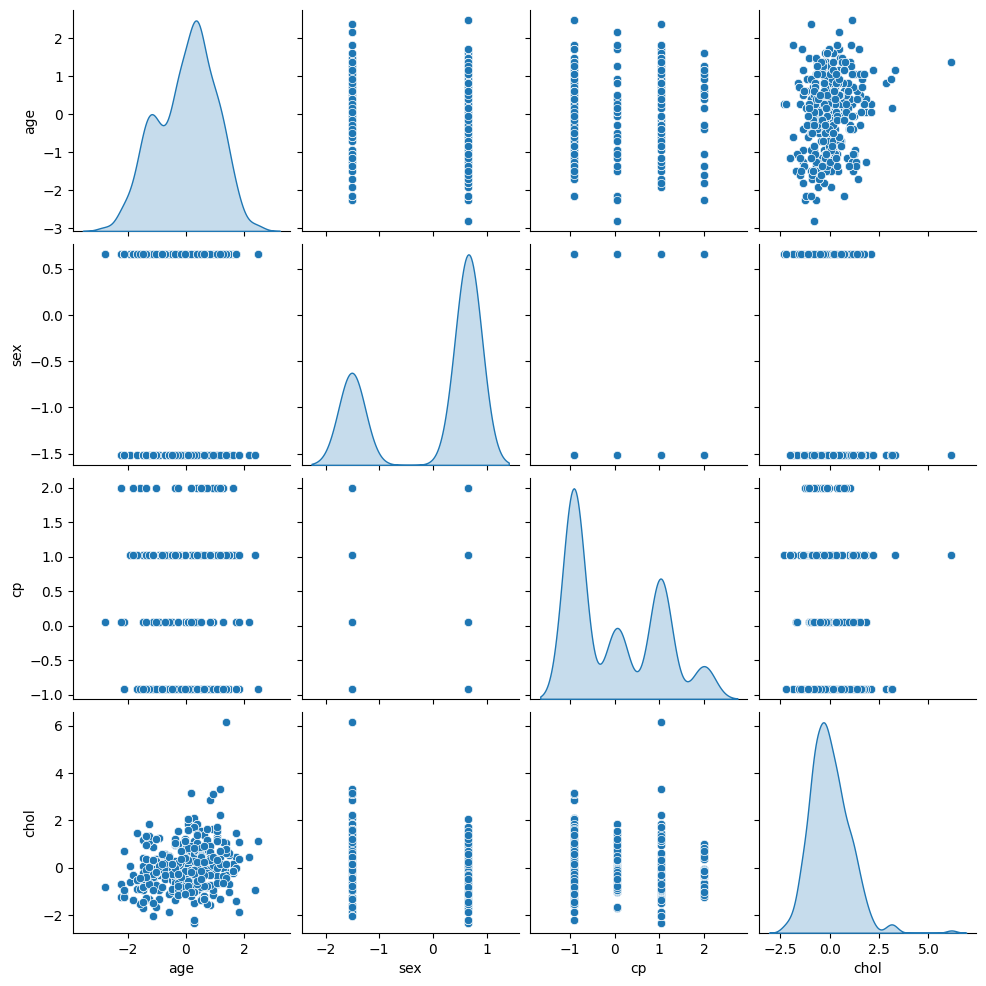

In [20]:
import seaborn as sns
sns.pairplot(df[features],diag_kind='kde')
plt.show()

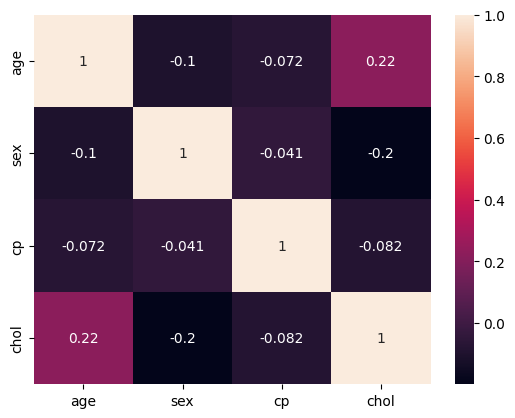

In [21]:
sns.heatmap(df[features].corr(), annot=True)
plt.show()

In [22]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principal_components=pca.fit_transform(df[features])


In [24]:
pca_df=pd.DataFrame(data=principal_components,columns=['PC1','PC2'])
pca_df['target']=df['target']

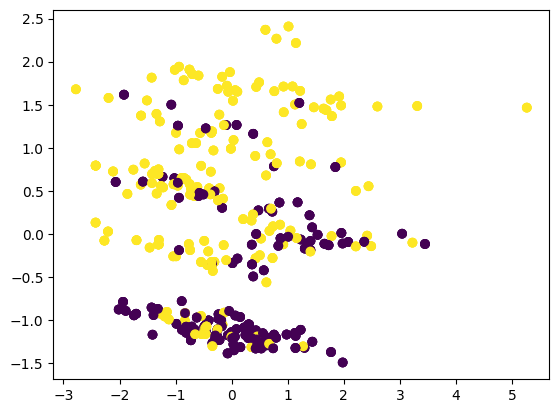

In [26]:
plt.scatter(pca_df['PC1'],pca_df['PC2'],c=pca_df['target'])
plt.show()

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


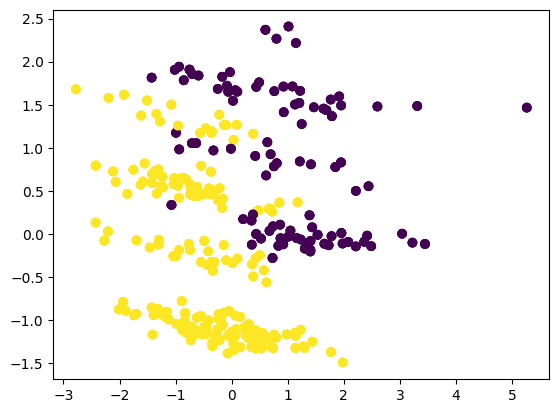

In [33]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
pca_df['cluster']=kmeans.fit_predict(df[features])

plt.scatter(pca_df['PC1'],pca_df['PC2'],c=pca_df['cluster'])
plt.show()